# Analysis of articles publications

In [5]:
# Importing of libraries
import nltk
import pandas as pd
from matplotlib import  pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import seaborn as sns
from nltk.util import ngrams
import re
import unicodedata
import os
sns.set_style("whitegrid")

In [2]:
# Downloading stopwords library
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\DELL LATITUDE
[nltk_data]     E6410\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\DELL LATITUDE
[nltk_data]     E6410\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\DELL LATITUDE
[nltk_data]     E6410\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [6]:
os.getcwd()

'C:\\Users\\DELL LATITUDE E6410\\Downloads'

In [7]:
business_source= pd.read_csv("514149837_BusinessSource.csv")
Taylor = pd.read_excel("1530549138_TaylorFrancis.xlsx")
Webof = pd.read_excel("174064709_WebofScience.xls")
Wiley = pd.read_excel("961449971_WileyOnline.xlsx")

In [8]:
Taylor.rename(columns={'AU':'Author'},inplace=True)
Webof.rename(columns={'Authors':'Author'},inplace=True)

In [9]:
# Concateneting all the dataset
data = pd.concat([business_source,Taylor,Webof,Wiley])

In [10]:
data.head()

,Article Title,Author,Journal Title,ISSN,ISBN,Publication Date,Volume,Issue,First Page,Page Count,...,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Unnamed: 67,KW,JA,C8,AB
0,A Model of Business Response to Climate Change...,"Ray, Subhasis",Vilakshan: The XIMB Journal of Management,"=""09731954""",NaN,"=""Sep2013""",10.0,2,113.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A multilevel approach for assessing business s...,"Paul, Arijit; Lang, Jonas W.B.; Baumgartner, R...",Journal of Cleaner Production,"=""09596526""",NaN,"=""Sep2017""",160.0,NaN,50.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADAPTATION TO CLIMATE CHANGE AND INTEGRATION O...,"XAVIER NICOLLETTI, MARIANA; CAMOLESI GUIMARÃES...",Ad-minister,"=""16920279""",NaN,"=""ene-jun2016""",NaN,28,91.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,After the green gold rush: the construction of...,"Janković, Vladimir; Bowman, Andrew",Economy & Society,"=""03085147""",NaN,"=""May2014""",43.0,2,233.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"BUSINESS AND CLIMATE CHANGE: TRENDS, ISSUES AN...","Iqbal, Badar Alam; Hassan, Munir; Rawat, Bhawa...",IBA Business Review,"=""19906587""",NaN,"=""Jul-Dec2013""",8.0,2,42.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Data cleaning
# Data extraction of abstracts
stop=stopwords.words('english')



In [12]:
# Removing stoping words
data['kwords_ws']=data['Keywords'].apply(lambda x: ' '.join([word.lower() for word in str(x).split() if word not in (stop)]))
data.head()

,Article Title,Author,Journal Title,ISSN,ISBN,Publication Date,Volume,Issue,First Page,Page Count,...,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Unnamed: 67,KW,JA,C8,AB,kwords_ws
0,A Model of Business Response to Climate Change...,"Ray, Subhasis",Vilakshan: The XIMB Journal of Management,"=""09731954""",NaN,"=""Sep2013""",10.0,2,113.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,business strategy
1,A multilevel approach for assessing business s...,"Paul, Arijit; Lang, Jonas W.B.; Baumgartner, R...",Journal of Cleaner Production,"=""09596526""",NaN,"=""Sep2017""",160.0,NaN,50.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,business organizations; business strategy; cor...
2,ADAPTATION TO CLIMATE CHANGE AND INTEGRATION O...,"XAVIER NICOLLETTI, MARIANA; CAMOLESI GUIMARÃES...",Ad-minister,"=""16920279""",NaN,"=""ene-jun2016""",NaN,28,91.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adaptation; business education; disaster risk ...
3,After the green gold rush: the construction of...,"Janković, Vladimir; Bowman, Andrew",Economy & Society,"=""03085147""",NaN,"=""May2014""",43.0,2,233.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,business; climate change; economic crisis; gre...
4,"BUSINESS AND CLIMATE CHANGE: TRENDS, ISSUES AN...","Iqbal, Badar Alam; Hassan, Munir; Rawat, Bhawa...",IBA Business Review,"=""19906587""",NaN,"=""Jul-Dec2013""",8.0,2,42.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,business; carbon emission; climate; ecological...


In [13]:
# Use of textblob to count words
blob=TextBlob(str(data['kwords_ws']))
frequency= pd.DataFrame.from_dict(blob.word_counts,orient='index',columns=['count'])
frequency.reset_index(inplace=True)

In [14]:
# Dropping non redunt words
frequency1= frequency.drop([0,3,6,11,17,21,23,24,25,26,27,28,29,30,22,31,32])

In [15]:
# Frequency of the first 20 words 
frequency2=frequency1[:20]
frequency2

,index,count
1,business,6
2,strategy,2
4,organizations,1
5,cor,1
7,adaptation,1
8,education,1
9,disaster,1
10,risk,1
12,climate,2
13,change,1


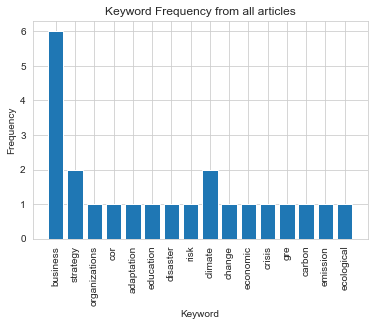

In [16]:
#Visualization of frequency of words
plt.bar(frequency1['index'],frequency1['count'])
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.title("Keyword Frequency from all articles")
plt.xticks(rotation=90)
plt.show();

In [17]:
#Use of ngrams
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [18]:
words = basic_clean(''.join(str(data['Abstract'].tolist())))


In [19]:
words[:20]

['business',
 'challenge',
 'arising',
 'climate',
 'change',
 'accelerating',
 'faster',
 'rate',
 'ever',
 'global',
 'corporation',
 'like',
 'walmart',
 'acknowledged',
 'responded',
 'challenge',
 'wellarticulated',
 'climate',
 'strategy',
 'indian']

In [20]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(climate, change)        385
(copyright, applies)      30
(article, individual)     30
(listserv, without)       30
(however, user)           30
(material, full)          30
(without, copyright)      30
(email, article)          30
(download, email)         30
(use, abstract)           30
dtype: int64

In [21]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

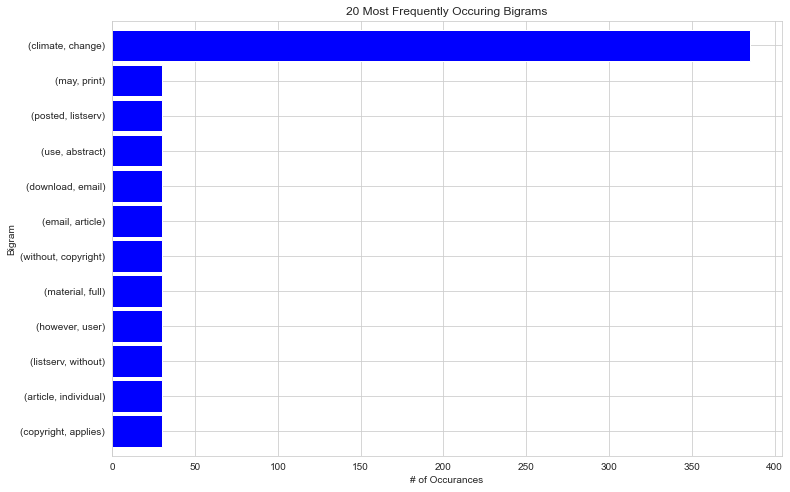

In [22]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [23]:
# How many articles were published each year
# Date
pub=(data.groupby(['Publication Year']).size().reset_index(name='Sum_of_articles'))[4:]
pub

,Publication Year,Sum_of_articles
4,2010.0,2
5,2011.0,3
6,2012.0,7
7,2013.0,2
8,2014.0,5
9,2015.0,5
10,2016.0,9
11,2017.0,8
12,2018.0,4
13,2019.0,8


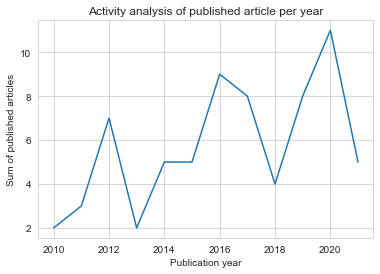

In [24]:
# Visualization of published per year
plt.plot(pub['Publication Year'],pub['Sum_of_articles'])
plt.xlabel("Publication year")
plt.ylabel("Sum of published articles")
plt.title("Activity analysis of published article per year")
plt.show();

In [32]:
# Authors who were prominent
data.columns

Index(['Article Title', 'Author', 'Journal Title', 'ISSN', 'ISBN',
       'Publication Date', 'Volume', 'Issue', 'First Page', 'Page Count',
       ...
       'Open Access Designations', 'Highly Cited Status', 'Hot Paper Status',
       'Date of Export', 'Unnamed: 67', 'KW', 'JA ', 'C8', 'AB ', 'kwords_ws'],
      dtype='object', length=101)

In [33]:
aut=data.groupby(['Author','Publication Year']).size().reset_index(name='Sum_of_articles')[:20]
aut

,Author,Publication Year,Sum_of_articles
0,"Alkaya, E; Bogurcu, M; Ulutas, F; Demirer, GN",2015.0,1
1,"Amran, A; Ooi, SK; Nejati, M; Zulkafli, AH; Li...",2012.0,1
2,"Amran, A; Ooi, SK; Wong, CY; Hashim, F",2016.0,1
3,"Arbex, M; Batu, M",2020.0,1
4,"Baranchenko, Y; Oglethorpe, D",2012.0,1
5,"Beall, E; Brocklesby, J",2017.0,1
6,"Becken, S; Wilson, J",2016.0,1
7,"Begum, RA; Pereira, JJ",2015.0,1
8,"Benites-Lazaro, LL; Gremaud, PA; Benites, LA",2018.0,1
9,"Bicknell, S; Mcmanus, P",2006.0,1


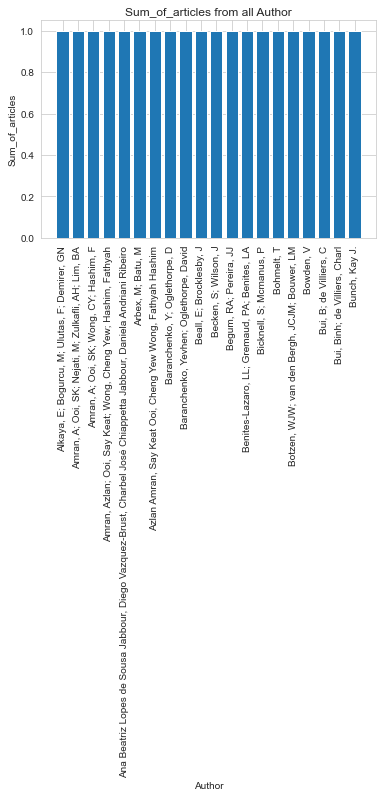

In [28]:
#Visualization of frequency of words
plt.bar(aut['Author'],aut['Sum_of_articles'])
plt.xlabel("Author")
plt.ylabel("Sum_of_articles")
plt.title("Sum_of_articles from all Author")
plt.xticks(rotation=90)
plt.show();

In [30]:
#Which article are mostly considered by publishers
pip=data.groupby(['Publisher','Article Title']).size().reset_index(name='Sum_of_articles')[:20]
pip

,Publisher,Article Title,Sum_of_articles
0,Academic Press Inc.,Business strategies and management accounting ...,1
1,Academy of Management,State of Undergraduate Business Education: A P...,1
2,"Danubius University of Galati, Faculty of Law",The Companies and the Climate Change: Differen...,1
3,"Ediciones Universidad de Navarra, SA",Cambio climático y responsabilidad empresarial...,1
4,Elsevier B.V.,A multilevel approach for assessing business s...,1
5,Elsevier B.V.,Management of landfill reclamation with regard...,1
6,Elsevier B.V.,Social and organizational learning in the adap...,1
7,Elsevier B.V.,Voluntary business engagement in climate chang...,1
8,Elsevier B.V.,Worktime Reduction as a Solution to Climate Ch...,1
9,Emerald Publishing Limited,Climate change as a corporate strategy issue: ...,1


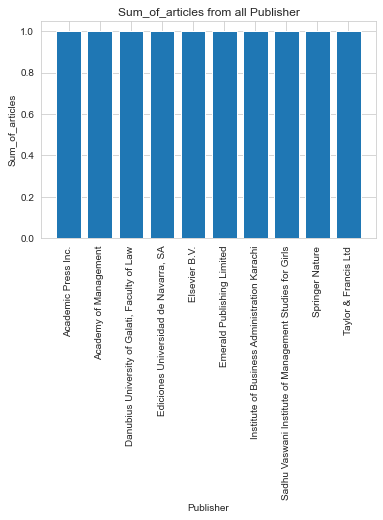

In [31]:
#Visualization of frequency of words
plt.bar(pip['Publisher'],pip['Sum_of_articles'])
plt.xlabel("Publisher")
plt.ylabel("Sum_of_articles")
plt.title("Sum_of_articles from all Publisher")
plt.xticks(rotation=90)
plt.show();